# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

In [6]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


In [7]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 5 columns):
Year       250000 non-null int64
Mileage    250000 non-null int64
State      250000 non-null object
Make       250000 non-null object
Model      250000 non-null object
dtypes: int64(2), object(3)
memory usage: 11.4+ MB


In [9]:
data_train2= data
data_train2["State2"]=pd.DataFrame(data_train2.State.astype("category").cat.codes)
data_train2["Make2"]=pd.DataFrame(data_train2.Make.astype("category").cat.codes)
data_train2["Model2"]=pd.DataFrame(data_train2.Model.astype("category").cat.codes)
data_train2=data_train2.drop(["Make","State","Model"], axis=1)
data_train2.head()

,Price,Year,Mileage,State2,Make2,Model2
0,21490,2014,31909,20,27,305
1,21250,2016,25741,17,6,83
2,20925,2016,24633,40,14,400
3,14500,2012,84026,36,17,248
4,32488,2013,22816,42,17,489


In [10]:
# One Hot Encoding
#data_train = pd.get_dummies(data)

# Extract features and labels
#labels = data['Price']
#features = data.drop('Price', axis = 1)
#data_train = pd.get_dummies(data, columns = ["State"], drop_first = True)
#data_train = pd.get_dummies(data_train, columns = ["Make"], drop_first = True)
#data_train = pd.get_dummies(data_train, columns = ["Model"], drop_first = True)
#data_train.shape()

In [11]:
data_test3= data_test
data_test3["State2"]=pd.DataFrame(data_test3.State.astype("category").cat.codes)
data_test3["Make2"]=pd.DataFrame(data_test3.Make.astype("category").cat.codes)
data_test3["Model2"]=pd.DataFrame(data_test3.Model.astype("category").cat.codes)
data_test3=data_test3.drop(["Make","State","Model"], axis=1)
data_test3.head()

,Year,Mileage,State2,Make2,Model2
ID,,,,,
0,2015,23388,35,10,165
1,2014,45061,38,10,169
2,2007,101033,48,36,85
3,2015,13590,11,17,489
4,2009,118916,5,8,99


In [12]:
#data_test2 = pd.get_dummies(data_test, columns = ["State"], drop_first = True)
#data_test2 = pd.get_dummies(data_test2, columns = ["Make"], drop_first = True)
#data_test2 = pd.get_dummies(data_test2, columns = ["Model"], drop_first = True)
#data_test2.head()

In [13]:
data_test3.columns.difference(data_train2.columns)

Index([], dtype='object')

In [14]:
X = data_train2.drop(['Price'], axis=1)
y = data_train2['Price']
# train/test split
from sklearn.model_selection import train_test_split, cross_val_score
train_features, test_features, train_labels, test_labels = train_test_split(X, y, random_state=1)

In [25]:
# List of features for later use
feature_list = list(train_features.columns)

# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels);

In [26]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(train_features, round(importance, 2)) for train_features, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Make predictions on test data
predictions = rf_exp.predict(test_features)

In [27]:
# Performance metrics
errors = abs(predictions - test_labels)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Performance metrics
baseline_errors = abs(predictions - test_labels)

# Calculate mean absolute percentage error (MAPE)
baseline_mape = 100 * np.mean((baseline_errors / test_labels))

# Compare to baseline
improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 2351.0877 degrees.
Improvement over baseline: 0.0 %.
Accuracy: 88.45 %.
Variable: Model2               Importance: 0.39
Variable: Year                 Importance: 0.26
Variable: Make2                Importance: 0.19
Variable: Mileage              Importance: 0.13
Variable: State2               Importance: 0.03


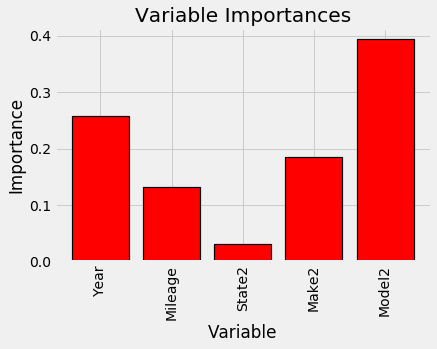

In [29]:
import matplotlib.pyplot as plt
# Reset style 
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

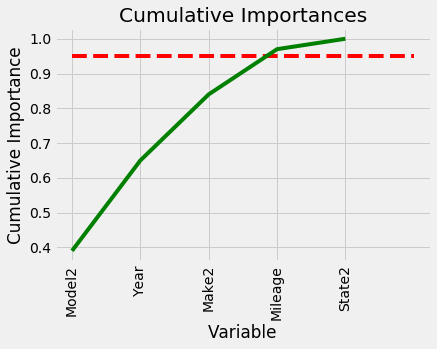

In [30]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [31]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 4


In [42]:
# Extract the names of the most important features
important_train_features = train_features.drop(['State2'], axis=1)
important_test_features = test_features.drop(['State2'], axis=1)

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (375000, 4)
Important test features shape: (125000, 4)


In [43]:
# Train the expanded model on only the important features
rf_exp.fit(important_train_features, train_labels);

In [44]:
#Evaluate on Important features
# Make predictions on test data
predictions = rf_exp.predict(important_test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 2570.4264 degrees.
Accuracy: 87.45 %.


In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(important_train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.7s


MemoryError: could not allocate 1835008 bytes

In [ ]:
rf_random.best_params_

In [ ]:
#Evaluation Function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
#Evaluate the Default Model
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(important_train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
y_pred.to_csv('test_submission.csv', index_label='ID')

In [ ]:
y_pred.head()

# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
